In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df['age']

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

In [7]:
df['age'].value_counts()

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: age, dtype: int64

In [8]:
df['age'].isnull().sum()

0

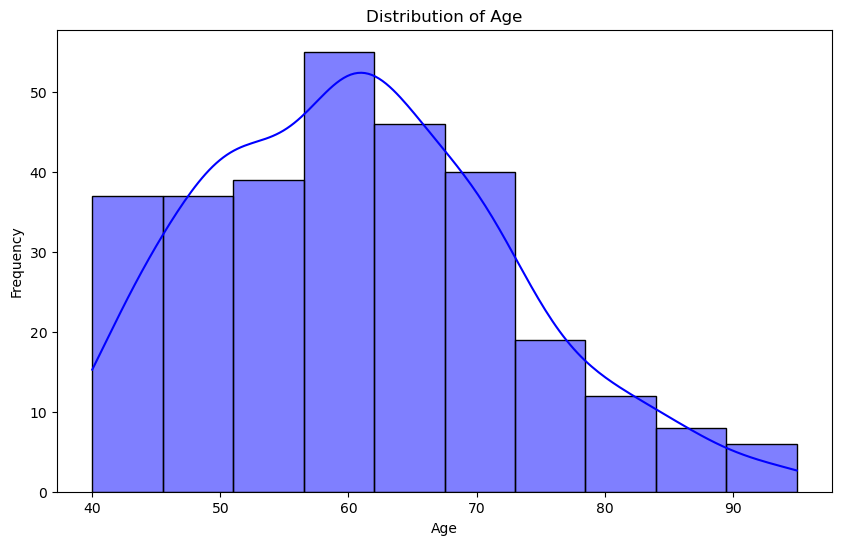

In [9]:
# 1. What is the distribution of age among heart failure patients in the dataset?

plt.figure(figsize = (10,6))
sns.histplot(df['age'], kde = True, color = 'b')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Insights :
# Most of the age groups are 60
# Age group between 40 to 55 are the same frequency
# After 75 years count of the people decreases

In [10]:
# 2. How does the death rate vary with age?

In [11]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:
df.groupby('DEATH_EVENT')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
DEATH_EVENT,,,,,,,,
0,203.0,58.761906,10.637890,40.0,50.0,60.0,65.0,90.0
1,96.0,65.215281,13.214556,42.0,55.0,65.0,75.0,95.0


In [13]:
DA = df.groupby('DEATH_EVENT')['age'].unique()

In [14]:
DA

DEATH_EVENT
0    [49.0, 65.0, 53.0, 50.0, 60.0, 72.0, 70.0, 55....
1    [75.0, 55.0, 65.0, 50.0, 90.0, 60.0, 80.0, 62....
Name: age, dtype: object

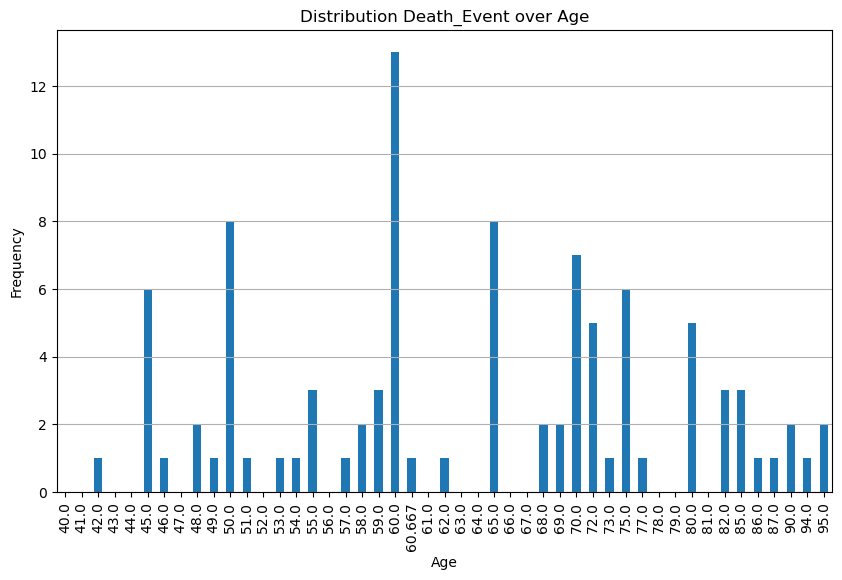

In [15]:
ADE = df.groupby('age')['DEATH_EVENT'].sum()
plt.figure(figsize = (10,6))
#sns.countplot(x = ADE)
ADE.plot(kind='bar')
plt.title("Distribution Death_Event over Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis= 'y')
plt.xticks(rotation=90)
plt.show()

In [17]:
# # Insights :
# Among the whole dataset 203 people are alive and 93 are dieds,
# In case of age group, most of the people died in the age of 60
# # Besides that age of 50 and 65 are died also 

In [18]:
# 3. What is the percentage of male and female patients in the dataset?

df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

In [19]:
df['sex'].value_counts(normalize = True)*100

1    64.882943
0    35.117057
Name: sex, dtype: float64

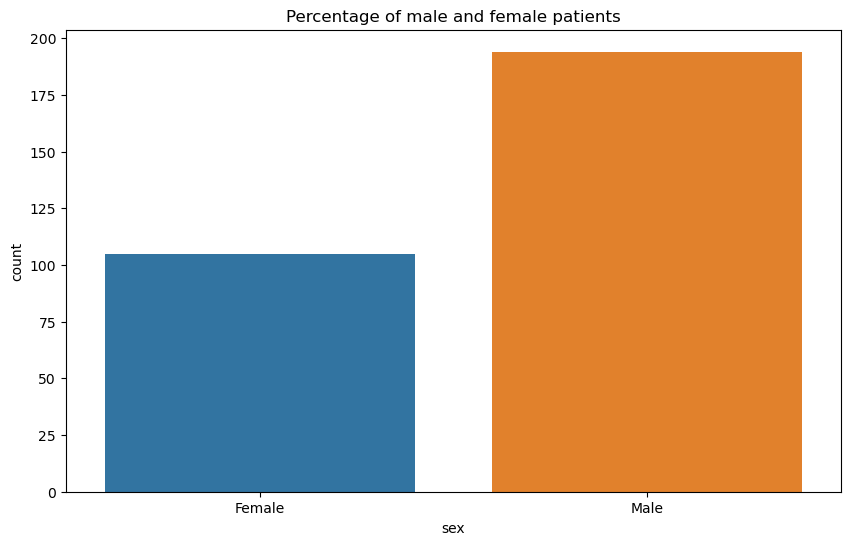

In [21]:

plt.figure(figsize=(10,6))
sns.countplot(x = df['sex'])
plt.title("Percentage of male and female patients")
plt.xticks(ticks = [0,1], labels = ['Female', 'Male'])
plt.show()

In [ ]:
# # Insights :
# In the given dataset 64% are Male and 35% are Female

In [22]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 4. How does the platelet count vary among different age groups?

In [23]:
df['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

<Figure size 1000x600 with 0 Axes>

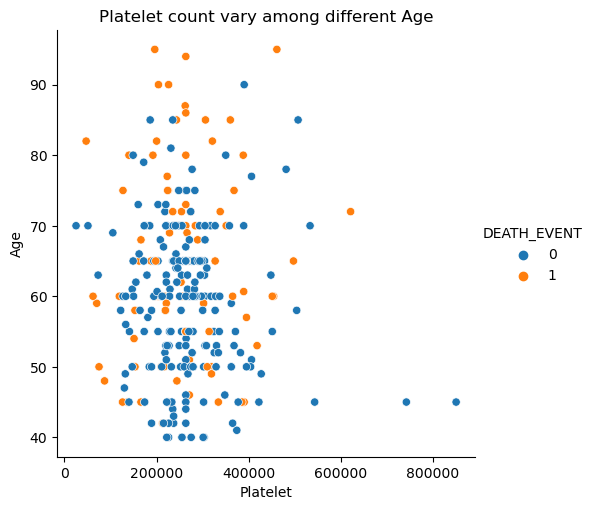

In [24]:
plt.figure(figsize=(10,6))
sns.relplot(x = df.platelets, y =  df.age,  data = df, hue = 'DEATH_EVENT')
plt.title("Platelet count vary among different Age")
plt.xlabel("Platelet")
plt.ylabel("Age")
plt.show()

In [ ]:
# Insights :
#Platelet count almost varies same with age group. Very slight decrease in platelet count as age increases
#Platelet count is mostly between 200000 and 400000 for all age group

In [ ]:
# plt.figure(figsize=(10,6))
# plt.scatter(y =  df.age, x = df.platelets)
# plt.title("Platelet count vary among different Age")
# plt.xlabel("Platelet")
# plt.ylabel("Age")
# plt.show()

In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 5. Is there a correlation between creatinine and sodium levels in the blood?

In [26]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

<AxesSubplot: xlabel='serum_creatinine', ylabel='Count'>

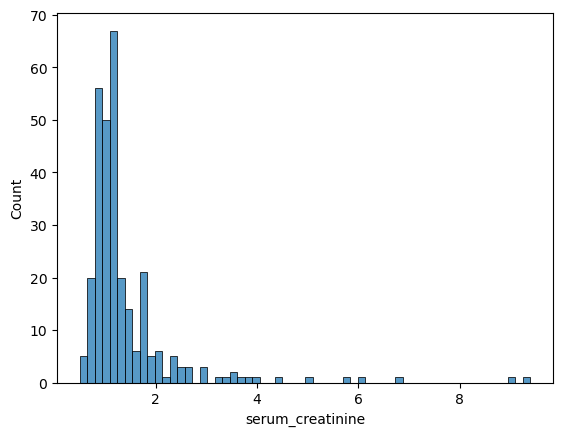

In [27]:
sns.histplot(df['serum_creatinine'])

In [28]:
df['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

<AxesSubplot: xlabel='serum_sodium', ylabel='Count'>

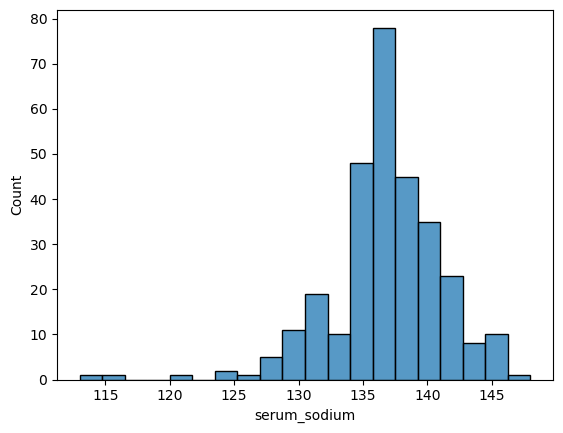

In [29]:
sns.histplot(df['serum_sodium'])

<Figure size 1000x600 with 0 Axes>

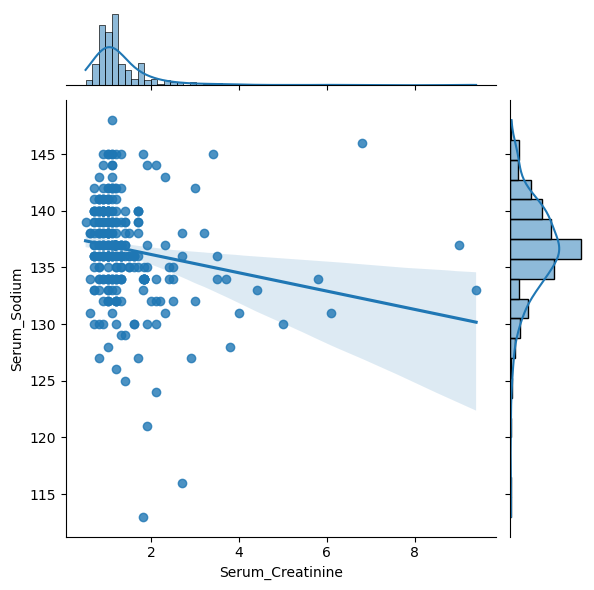

In [30]:
plt.figure(figsize=(10,6))
sns.jointplot(x = df['serum_creatinine'], y = df['serum_sodium'], data = df, kind="reg")
#plt.title("Correlation between Creatinine and Sodium levels")
plt.xlabel("Serum_Creatinine")
plt.ylabel("Serum_Sodium")
plt.show()


In [ ]:
df.columns

In [ ]:
# 6. How does the prevalence of high blood pressure differ between male and female patients?

In [31]:
df['high_blood_pressure'].describe()

count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

In [32]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [33]:
hbp = df.groupby('sex')['high_blood_pressure'].value_counts()

In [34]:
hbp

sex  high_blood_pressure
0    0                       61
     1                       44
1    0                      133
     1                       61
Name: high_blood_pressure, dtype: int64

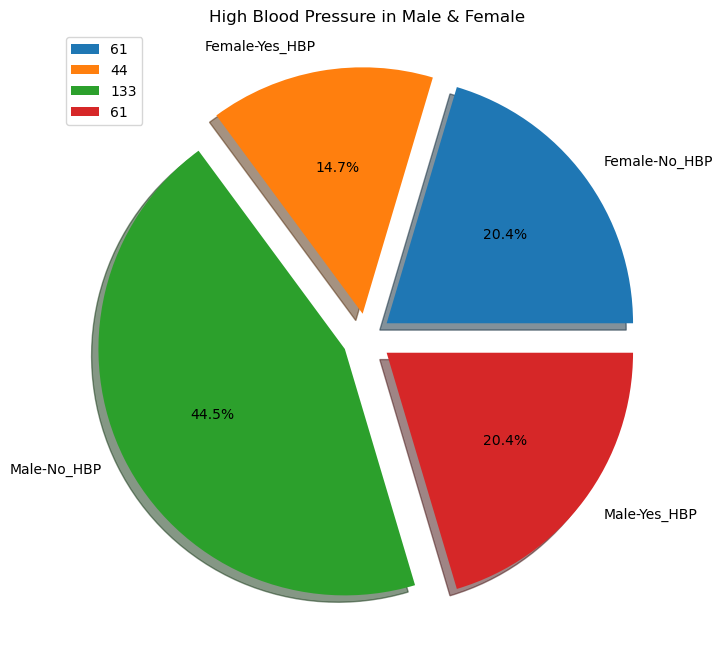

In [35]:
plt.figure(figsize=(10,8))
plt.pie(hbp, autopct = '%.1f%%', explode = [0.1, 0.1, 0.1, 0.1], labels = ['Female-No_HBP', 'Female-Yes_HBP', 'Male-No_HBP','Male-Yes_HBP'], shadow=True)
plt.title('High Blood Pressure in Male & Female')
plt.legend(hbp, loc='upper left')
plt.show()

In [ ]:
# Insights :
#     Most of the Male patients have no High Blood Pressure - 44.5%
#     # Among the Female patients only 14.7% have High Blood Pressure

In [ ]:
df.columns

In [ ]:
# 7. What is the relationship between smoking habits and the occurrence of heart failure?

In [36]:
df.smoking.value_counts(normalize = True)*100

0    67.892977
1    32.107023
Name: smoking, dtype: float64

In [37]:
df.DEATH_EVENT.value_counts(normalize = True)*100

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64

In [38]:
SDE = df.groupby('DEATH_EVENT')['smoking'].value_counts()

In [39]:
SDE

DEATH_EVENT  smoking
0            0          137
             1           66
1            0           66
             1           30
Name: smoking, dtype: int64

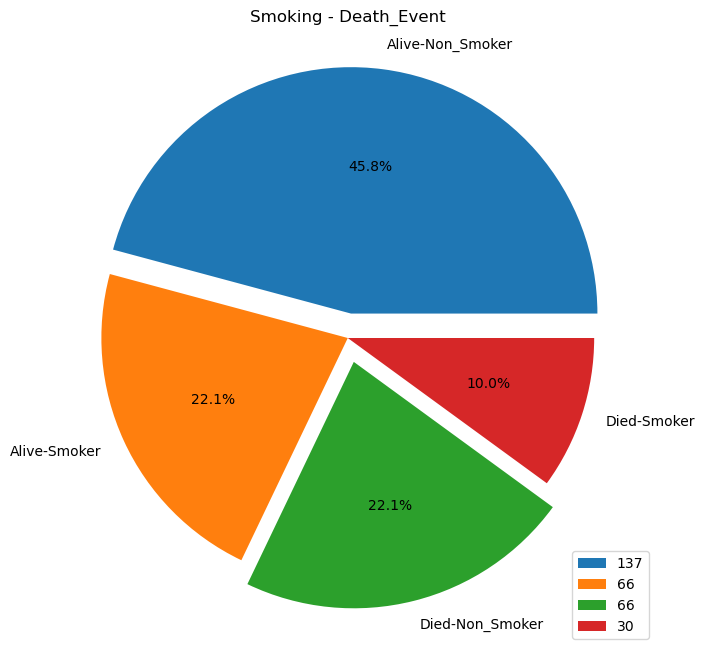

In [40]:
plt.figure(figsize=(10,8))
plt.pie(SDE, autopct = '%.1f%%', labels = ['Alive-Non_Smoker','Alive-Smoker','Died-Non_Smoker','Died-Smoker'], explode = [.1,0,0.1,0])
plt.title("Smoking - Death_Event")
plt.legend(SDE)
plt.show()

In [ ]:
# Insights :
#     Patients who not smokes and alive - 45.8%
#     Patients who not smokes and died - 22.1% 
#     Patients who smokes and alive - 22.1.8%
#     Patients who smokes and died - 10.0%
    

In [ ]:
# 8. Are there any noticeable patterns in the distribution of death events across different age group

In [41]:
ADE = df.groupby('age')['DEATH_EVENT'].sum()

In [42]:
ADE

age
40.000     0
41.000     0
42.000     1
43.000     0
44.000     0
45.000     6
46.000     1
47.000     0
48.000     2
49.000     1
50.000     8
51.000     1
52.000     0
53.000     1
54.000     1
55.000     3
56.000     0
57.000     1
58.000     2
59.000     3
60.000    13
60.667     1
61.000     0
62.000     1
63.000     0
64.000     0
65.000     8
66.000     0
67.000     0
68.000     2
69.000     2
70.000     7
72.000     5
73.000     1
75.000     6
77.000     1
78.000     0
79.000     0
80.000     5
81.000     0
82.000     3
85.000     3
86.000     1
87.000     1
90.000     2
94.000     1
95.000     2
Name: DEATH_EVENT, dtype: int64

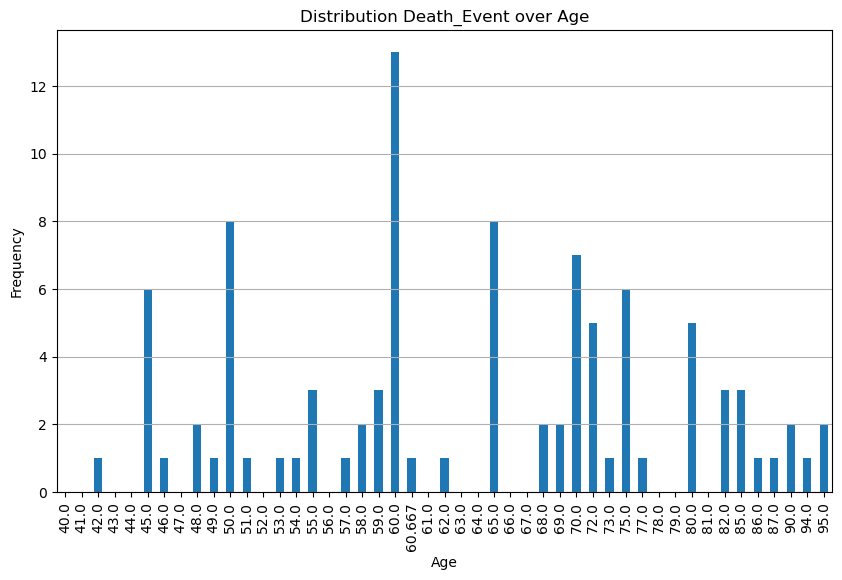

In [43]:

plt.figure(figsize = (10,6))
#sns.countplot(x = ADE)
ADE.plot(kind='bar')
plt.title("Distribution Death_Event over Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis= 'y')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # Insights :
# Among the whole dataset 203 people are alive and 93 are dieds,
# In case of age group, most of the people died in the age of 60
# # Besides that age of 50 and 65 are died also 

In [44]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 9. Is there any significant difference in ejection fraction between patients with and without diabetes?

In [45]:
df['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

In [46]:
df['ejection_fraction'].value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64

In [49]:
df['ejection_fraction'].mean()

38.08361204013378

In [47]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [50]:
df['diabetes'].mean()

0.4180602006688963

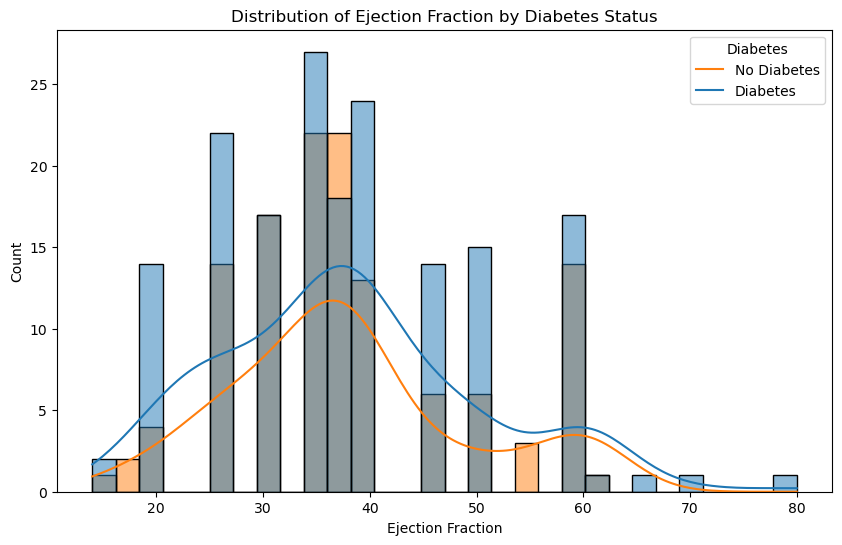

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ejection_fraction', hue='diabetes', kde=True, bins=30)
plt.title('Distribution of Ejection Fraction by Diabetes Status')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
plt.show()


In [51]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# 10. How does the serum creatinine level vary between patients who survived and those who did not?

In [53]:
df['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

In [54]:
df['serum_creatinine'].value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

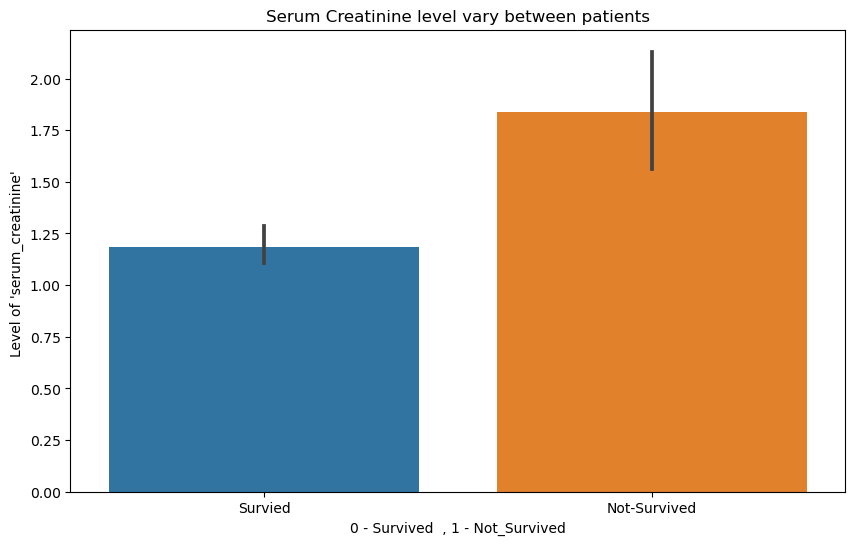

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'DEATH_EVENT', y = 'serum_creatinine')
plt.title("Serum Creatinine level vary between patients")
plt.xlabel("0 - Survived  , 1 - Not_Survived")
plt.ylabel("Level of 'serum_creatinine' ")
plt.xticks(ticks = [0,1], labels = ['Survied', 'Not-Survived'])
plt.show()
                                    


In [56]:
df.groupby('DEATH_EVENT')['serum_creatinine'].mean()

DEATH_EVENT
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

In [ ]:
# Insights :
#     Patients who have average Serum Creatinine level 1.18 survived
#     Patients who have average Serum Creatinine level 1.83 not survived
